# Week1_5_DataVisualization


<p><a id="table"> </a></p>
<h3 id="Table-of-Contents">Table of Contents<a class="anchor-link" href="#Table-of-Contents">¶</a></h3>
<ol>
<h3>3 <a href="#datavisualization">Data visualization</a><br/></h3>
3.1 <a href="#basicsofmatplotlib">Basics of matplotlib</a><br/>
3.2 <a href="#basicplots">Basic plots</a><br/>
3.3 <a href="#combinedplot">Combined plot</a><br/>
3.4 <a href="#plottinghousingpricetrend(optional)">Plotting housing price trend (optional)</a><br/>
</ol>

<p><a id="datavisualization"> </a></p>
<h2 id="datavisualization">3 <a href="#table">Data visualization</a><a class="anchor-link" href="#datavisualization">¶</a></h2>

In the last section, we introduced various data munipulation skills and presented the results in DataFrame using pandas; however, some of the results can be displayed more intuitively by plotting e.g., scatterplot and trend lines, rather than simply showing the plain tables alone. In this part, you will be enaged in visualizing DataFrame using various kinds of plotting choices that are provided by the matplotlib and seaborn packages.

<p><a id="basicsofmatplotlib"> </a></p>
<h3 id="basicsofmatplotlib">3.1 <a href="#table">Basics of matplotlib</a><a class="anchor-link" href="#basicsofmatplotlib">¶</a></h3>


<img src="img/matplotlib.jpg" style="width:450px; height:400px"/> 


A basic plot generated by the matplotlib library consists of the following two components: 

**[figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)**: The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can contain any number of Axes, but will typically have at least one.


**[Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)**: This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. Each Axes has a title, an x-label, and a y-label, etc.

The figure below shows the relationship between *figure* and *axes*. The whole figure consists of three axes.
<img src="img/figureaxes.jpg" style="width:400px; height:200px"/> 


To create a basic plot, we need to define the **figure** and **axes**:
```python
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(1, 3)  # a figure with a 1x3 grid of Axes (1 row, 3 columns just like the figure one)
fig, axs = plt.subplot(2,2) # a figure with a 2x2 grid of Axes (2 row, 2 columns)
```


Help Materials:
- The codes for various ploting examples: https://matplotlib.org/gallery/index.html
- For matplotlib cheat sheet: https://github.com/matplotlib/cheatsheets/tree/master



Next, let us introduce several examples that plot different kinds of figures using matplotlib. First, we need to import the **matplotlib** package. Also, to make matplotlib figures show up in notebooks, include this line in your notebooks: **%matplotlib inline**. This is a magic function that initializes matplotlib properly in the Jupyter NoteBook.

Also import the package **seaborn**. Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, generally with a better looking than merely using matpolitlib 

In [153]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [154]:
import pandas as pd
import numpy as np

Now load the final housing dataset we exported in the last section. We will explore the relationship of two variables: distance to the nearest subway station and housing price. 

In [155]:
# import the combined dataset, and assign a name df_combine
df_combine = pd.read_excel("housing_combine.xlsx")

In [156]:
df_combine

,Unnamed: 0,HouseID,CommunityID,TotalPrice,TransYear,Bedroom,Livingroom,Bathroom,Size,FloorLevel,...,Dist2Subway,HospQuality,Dist2Hosp,NumHosp1km,NumBus200m,Dist2CBD,Dist2Center,DistrictID,DistName_En,DistName_Ch
0,0,BJFT84326414,1544,1400010.56,2012,2,1,1,69.68,1,...,633.24007,9,1803.02071,0,1,9345.20091,7396.31505,2,Fengtai,丰台
1,1,BJFT00386624,3621,1800006.91,2012,2,1,1,98.69,3,...,939.29061,9,1698.79101,0,10,16309.85203,11427.48851,2,Fengtai,丰台
2,2,BJFT84585957,3607,757014.00,2012,1,0,1,26.94,2,...,418.59917,9,1747.82244,0,5,7084.13849,7200.33810,2,Fengtai,丰台
3,3,BJFT84434389,3171,1043222.04,2012,1,1,1,57.96,2,...,2425.86815,9,4863.04910,0,2,14488.67850,10848.98986,2,Fengtai,丰台
4,4,BJFT84439200,1295,1150036.80,2012,1,1,1,55.20,2,...,797.29343,9,2889.03867,0,12,16736.13924,12090.55677,2,Fengtai,丰台
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,24992,BJMT91499815,3806,1440075.08,2016,2,1,1,76.13,5,...,6184.24524,7,1485.51072,0,0,30490.26155,24995.63395,13,Mentougou,门头沟
24993,24993,101101000000,542,3400083.95,2016,2,1,1,89.45,3,...,5118.03636,7,2120.75266,0,0,29434.18998,23945.13966,13,Mentougou,门头沟
24994,24994,101101000000,2998,3600116.52,2016,3,1,1,117.26,2,...,6532.98242,7,522.45348,1,22,30821.21620,25352.70127,13,Mentougou,门头沟
24995,24995,101100000000,1728,1900028.00,2016,1,1,1,61.00,1,...,5386.81625,7,1684.72825,0,0,29693.26899,24217.50164,13,Mentougou,门头沟


In [158]:
# If you do not have the column "UnitPrice", run the following code: 
df_combine["UnitPrice"] = df_combine["TotalPrice"] / df_combine["Size"]

<p><a id="basicplots"> </a></p>
<h3 id="basicplots">3.2 <a href="#table">Basic plots</a><a class="anchor-link" href="#basicplots">¶</a></h3>


#### 1. Scatter plot

A scatter plot is extensively used to descriptive analysis for exploring the association of two variables. In matplotlib, we can use the function `df.plot(kind = "scatter")` or `df.plot.scatter()` to generate a scatter plot.

For more about `pd.plot()`: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html#


Now, let us create a scatterplot showing the relationship between unit housing price and distance to subway stations:

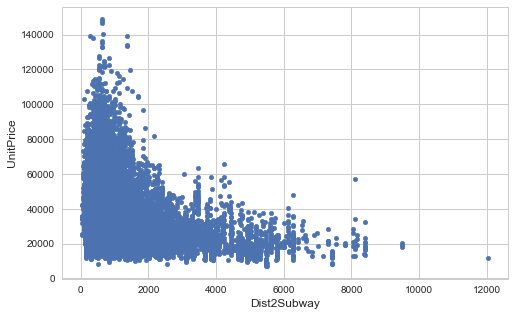

In [159]:
# define Figure and Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

# a scatter plot comparing Dist2Subway and UnitPrice
df_combine.plot(kind='scatter', x = 'Dist2Subway',y = 'UnitPrice', color = "b", ax = ax) 


In the above code:
- the first line `fig, ax =` initializes the two basic components of a Canvas&mdash;figure and axes, and presents them with the abbreviation&mdash;fig and ax. 
- `nrows=1, ncol=1` means the figure consists of one row and one column. In other words, there is only one Axes (plot) within the whole figure region. 
- `figsize = (5,3)` defines the width and length of the Axes(plot)&mdash;5 inches width by 3 inches height. 
- In the `df.plot()`, pay attention to the parameter `ax = ax`. It means that the scatterplot is generated on the Axes called ax. There is only one Axes in our case, but you may deal with a combined figure later with multiple Axes (ax[1], ax[2],...).

Adding the artists (the legend, titles, labels, and ticks, etc.) can be done using the the specific function for each artist, commonly in the format of `ax.artist_name()`. Again, the `ax.` means adding certain component on the ax plot. 

#### Change the parameters to make the plot looks nicer: 

Text(0.5, 1.0, 'The relationship between housing price and subway accessibility')

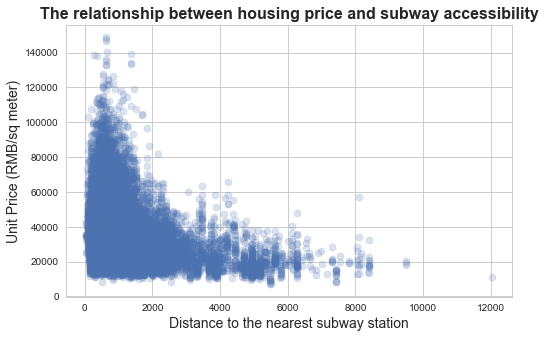

In [160]:
# define Figure and Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

# a scatter plot comparing Dist2Subway and UnitPrice
df_combine.plot(kind='scatter', x = 'Dist2Subway',y = 'UnitPrice', color = "b", s= 50, alpha = 0.2, ax = ax) 

# add title and customize the labels of x and y axis. 
ax.set_xlabel("Distance to the nearest subway station", fontsize=14)
ax.set_ylabel("Unit Price (RMB/sq meter)", fontsize=14)
ax.set_title("The relationship between housing price and subway accessibility", fontsize=16, fontweight='bold')

#### Seaborn package
Let us now plot the relationship between Unit housing price and the district to subway stations using `seaborn`.

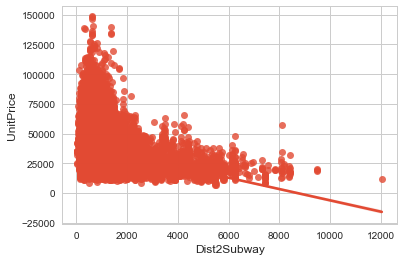

In [161]:
# basic plot using sns.regplot
sns.regplot(data=df_combine, x='Dist2Subway', y='UnitPrice')

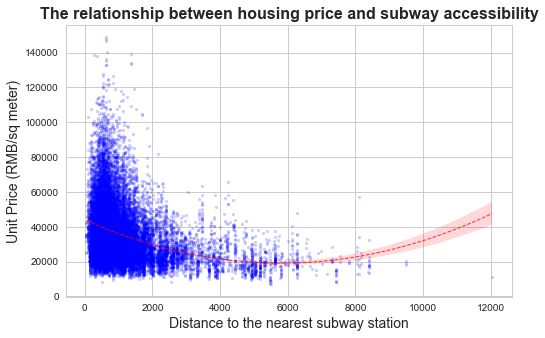

In [162]:
# Define Figure and Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

# Create a scatter plot with a trend line using Seaborn
sns.regplot(data=df_combine, x='Dist2Subway', y='UnitPrice', order=2,
            scatter_kws={'color': 'blue', 's': 10, 'alpha': 0.2}, 
            line_kws={
                'color': 'red',        # Line color
                'linewidth': 1,        # Line width
                'linestyle': '--',     # Line style
                'alpha': 0.8},           # Line transparency
            ax=ax)

# Customize the labels and title
ax.set_xlabel("Distance to the nearest subway station", fontsize=14)
ax.set_ylabel("Unit Price (RMB/sq meter)", fontsize=14)
ax.set_title("The relationship between housing price and subway accessibility", fontsize=16, fontweight='bold')

# Show the plot
plt.show()

**2. Histograms**

In matplotlib, we can use the function `df.plot(kind = "hist")` or `df.hist()` to generate histograms. 

Now let us plot the histogram of the UnitPrices of 2012 and 2016 in a single Axes (plot) to compare the price distribution between the two years. 
- I use `df_combine.loc[ ]` to select the DataFrame of UnitPrice in 2012 and 2016, respectively. 
- In the `df.plot()`, the argument `label` specifies what will be shown in the figure **legend**. 
- `ax.legend()` places a legend on the Axes,  
- `fig.savfig()` saves the figure in the designated file folder. 

We can also change the style of the plotting:

- `plt.style.use('default')`: this is the matplotlib default
- `plt.style.use('seaborn-darkgrid')`: seaborn-darkgrid style
- `plt.style.use('ggplot')`: ggplot style

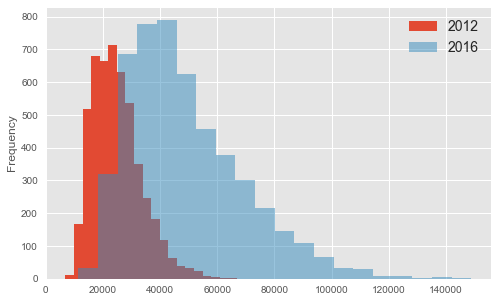

In [163]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 5))

# slice the unitprice in 2012 and 2016 using df.loc[]
df_combine.loc[df_combine["TransYear"] == 2012, "UnitPrice"].plot(kind = "hist", bins = 20, 
                                                                   ax = ax, label = "2012", alpha = 1)
df_combine.loc[df_combine["TransYear"] == 2016, "UnitPrice"].plot(kind = "hist", bins = 20, 
                                                                   ax = ax, label = "2016", alpha = 0.5)

ax.legend(fontsize=14)
fig.savefig("hist.png")


#### Add kernel density estimation using seaborn

- The seaborn.histplot() allows us for more advanced plotting options. Let us plot housing price distributions for all the years we have (2012-2016)  
    - `hue` in seaborn: differentiating data points based on the values of another variable. This is particularly useful for categorical variables, as it allows you to color code the data points or elements in the plot based on different categories.

Text(0, 0.5, 'Frequency')

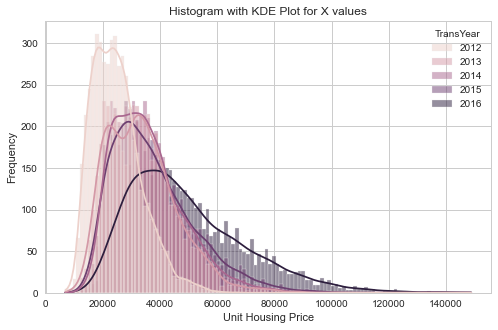

In [227]:
plt.style.use('seaborn-whitegrid')

# Define Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5))

# Add KDE plots using Seaborn
sns.histplot(data=df_combine, hue="TransYear", x="UnitPrice", kde = True, ax = ax)

ax.set_title('Histogram with KDE Plot for X values')
ax.set_xlabel('Unit Housing Price')
ax.set_ylabel('Frequency')

### **3. Boxplots**
Let us now visualize the relationship between housing price and Transaction years based on boxplot

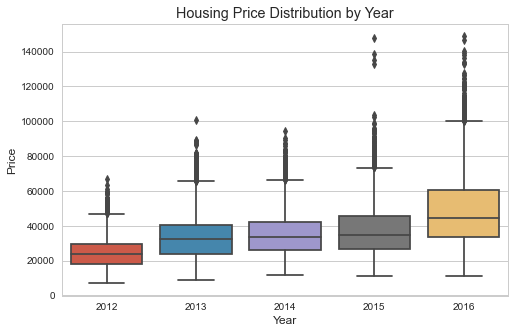

In [165]:
# Plotting the boxplot for housing prices by year
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_combine, x='TransYear', y='UnitPrice')
plt.title('Housing Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Let us explore the impacts of presence of elevator on housing price. We need to make sure the building heights are the same for comparison. equipping an elevator for a 6-story building is much less important than 20-story buildings.
   - let us compare 6-story buildings only.
   - let us select four urban distrcit: ["Xicheng", "Dongcheng", "Chaoyang", "Haidian"]

In [203]:
# select buildings with 6-floors
df_subset = df_combine[df_combine["TotalFloor"] == 6]

urban_district = ["Xicheng", "Dongcheng", "Chaoyang", "Haidian"]
df_subset = df_subset[df_subset['DistName_En'].isin(urban_district)]

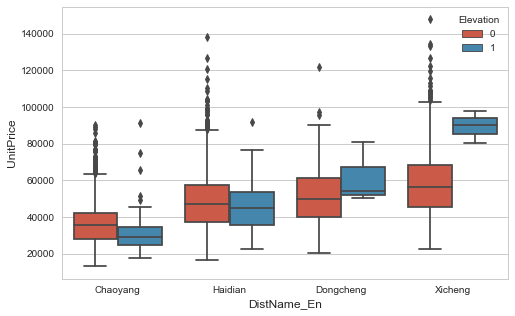

In [204]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_subset, hue = "Elevation", x='DistName_En', y='UnitPrice')

### 4. Barplot

A Bar Chart can be generated by the functions `df.plot(kind = "bar")/df.plot.bar()` or `sns.barplot()`, and it is frequently used together with `.groupby()`. Let us make a bar chart depicting the average housing price and the average total floors (building height) among the inner city districts&mdash;Xicheng, Dongcheng, and the suburban districts&mdash;Fangshan and Changping. 

In the `df.plot()` function, you may find the units measuring housing prices (RMB or yuan) and total floors are different, and that indicates you cannot use a single y-axis to present the two units, as the unit of total floor is too small compared to yuan (Chinese dollars). To solve this issue, we can add an argument `secondary_y` that specifies the variable (UnitPrice or TotalFloor) to be plotted on the secondary y-axis. 

Now let us look at the housing price distribution by District. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

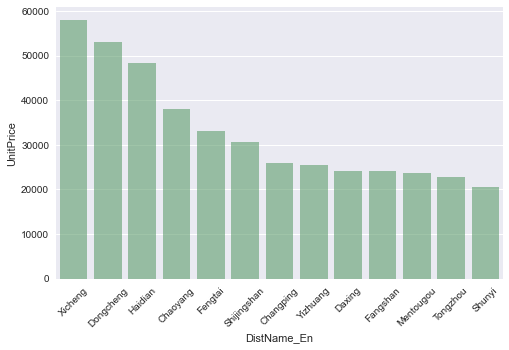

In [228]:
plt.style.use('seaborn')

# groupby total floors
df_bar = df_combine.groupby("DistName_En")[["UnitPrice"]].mean()

# Sort the dataframe by UnitPrice in descending order
df_bar = df_bar.sort_values(by='UnitPrice', ascending=False).reset_index()

# bar plot
plt.figure(figsize=(8, 5))
# df_bar.plot(kind = "bar", y=['UnitPrice'], rot=45, ax = ax)
sns.barplot(x='DistName_En', y='UnitPrice', data=df_bar,  color='g', alpha=0.6)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

Text(0, 0.5, 'Your second Y-Axis Label goes here!')

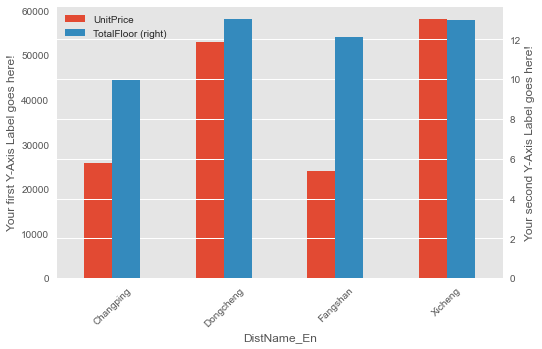

In [205]:
plt.style.use('ggplot')

# subset four districts: 
urban_district = ["Dongcheng", "Xicheng", "Fangshan", "Changping"]
df_subset = df_combine[df_combine["DistName_En"].isin(urban_district)]

# groupby housing price and total floors
df_bar = df_subset.groupby("DistName_En")[["UnitPrice", "TotalFloor"]].mean()

# bar plot
fig, ax = plt.subplots(figsize=(8, 5))
df_bar.plot(kind = "bar", y=['UnitPrice', 'TotalFloor'], secondary_y=['TotalFloor'],
               rot=45, ax = ax)

ax.set_ylabel('Your first Y-Axis Label goes here!')
ax.right_ax.set_ylabel('Your second Y-Axis Label goes here!')

#ax.right_ax.set_ylim(0, 25)
#ax.set_ylim(0, 90000)


Another more common method to solve the above question is to use `ax2 = ax.twinx()`. Google it if you have interest!

### 5. HeatMap

In our combined dataset, we can observe that the specific time of house transactions can be precise to the year-month-day. Now, we want to examine the trend of transaction prices (average value) for each month from January 2012 to December 2016. We can use either a Lineplot or a HeatMap to achieve this. Below, let us first see how to achieve this using Seaborn HeatMap.

In [237]:
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().unstack()
# `unstack()` is used to reshape the DataFrame to have years as rows and months as columns.
df_avg_price

TransMonth,1,2,3,4,5,6,7,8,9,10,11,12
TransYear,,,,,,,,,,,,
2012,20994.907216,20848.171340,21974.028646,23995.297158,23252.150376,24701.760536,24653.476190,25728.876316,26256.133858,26647.205128,26660.713193,27312.059701
2013,29222.855379,29525.848101,32781.868039,31036.358079,32852.268293,34106.260309,34565.777487,35542.987705,35327.773784,36384.518817,38677.685106,37369.570064
2014,36732.762411,37127.168142,38259.949405,37597.541833,37486.254181,35474.615625,34776.416201,33012.319239,34025.622912,35511.156484,35721.983022,35694.235409
2015,35277.508130,36191.621622,36440.494033,36753.658436,37160.933045,35699.390728,36410.948661,38365.721277,39283.283237,38043.903646,37868.710417,40340.482496
2016,41049.658000,40952.325062,42813.606688,43904.129518,46948.748634,47074.225064,48773.650909,51973.511692,59690.908360,60997.125828,59054.905797,60737.208333


Text(88.0, 0.5, 'Year')

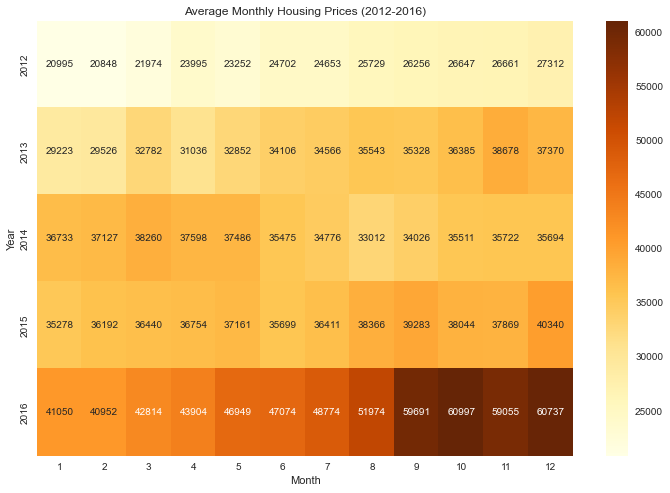

In [246]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_avg_price, annot=True, fmt=".0f", cmap='YlOrBr')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Month')
plt.ylabel('Year')

### 6. Lineplot

Now let us achieve this function via lineplot. 

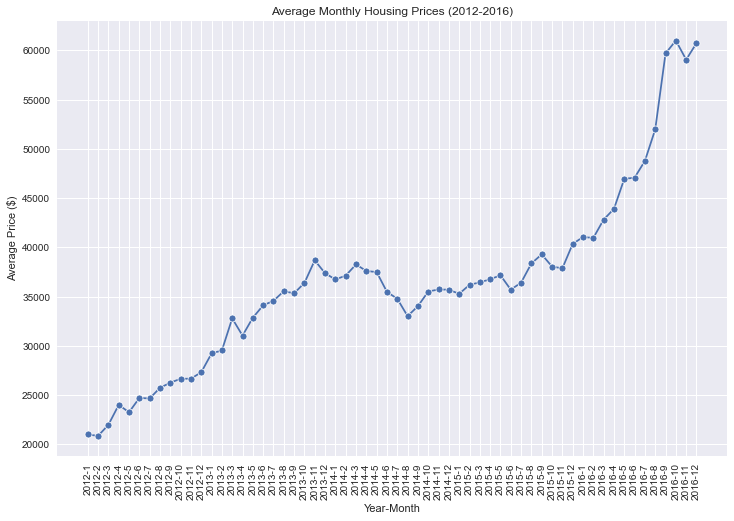

In [264]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().reset_index()

# Combine year and month into a single column for plotting
df_avg_price['year_month'] = df_avg_price['TransYear'].astype(str) + '-' + df_avg_price['TransMonth'].astype(str)

# df_avg_price['year_month'] = pd.to_datetime(df_avg_price['TransYear'].astype(str) + 
#                                             '-' + df_avg_price['TransMonth'].astype(str) + 
#                                             '-01')

# Plotting the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_avg_price, x='year_month', y='UnitPrice', marker='o')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Year-Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

<p><a id="combinedplot"> </a></p>
<h3 id="combinedplot">3.3 <a href="#table">Combined plot</a><a class="anchor-link" href="#combinedplot">¶</a></h3>

We can generate a combined figure with multiple plots in a single figure, for example, in the following code, we create four Axes (plots) and each of them showing different kinds of plot. The `nrows = 2, ncols = 2` means creating a figure with two rows and two columns, and arrange the Axes just like the elements in a 2 by 2 matrix.   

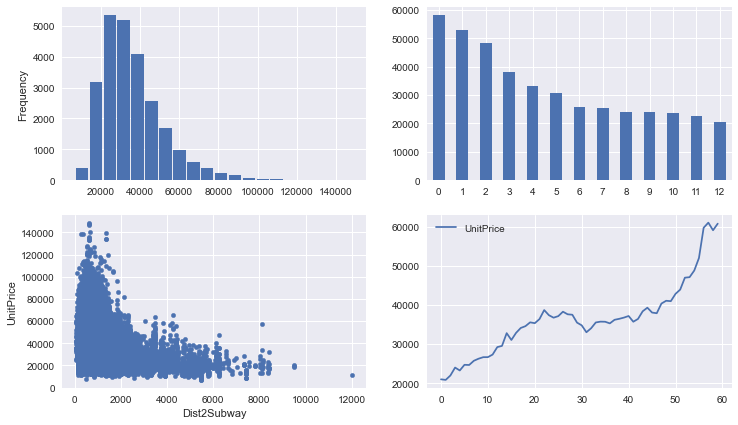

In [272]:
# create fig and ax
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,7))

# add histogram to first row first col
df_combine["UnitPrice"].plot(kind = "hist", bins = 20, rwidth = 0.9, ax = ax[0][0])

# add bar chart to first row second col (using df_bar)
df_bar["UnitPrice"].plot(kind = "bar", rot = 0,  ax = ax[0][1])

# add scatter plot to second row second col
df_combine.plot(kind = "scatter", x = "Dist2Subway", y = "UnitPrice", ax = ax[1][0])

# add line plot to second row second col
df_avg_price.plot(kind = "line", y = "UnitPrice", ax = ax[1][1])

# save figure
plt.savefig("combine_plot.tif", dpi = 200)

We can generate a combined figure with multiple plots in a single figure. For example, we can create five lineplots, showing the housing price change from January to December for each year. 

- In the following code, we create five Axes (plots). The `nrows = 5, ncols = 1` means creating a figure with five rows and one columns, and arrange the Axes just like the elements in a 5 by 1 matrix.    

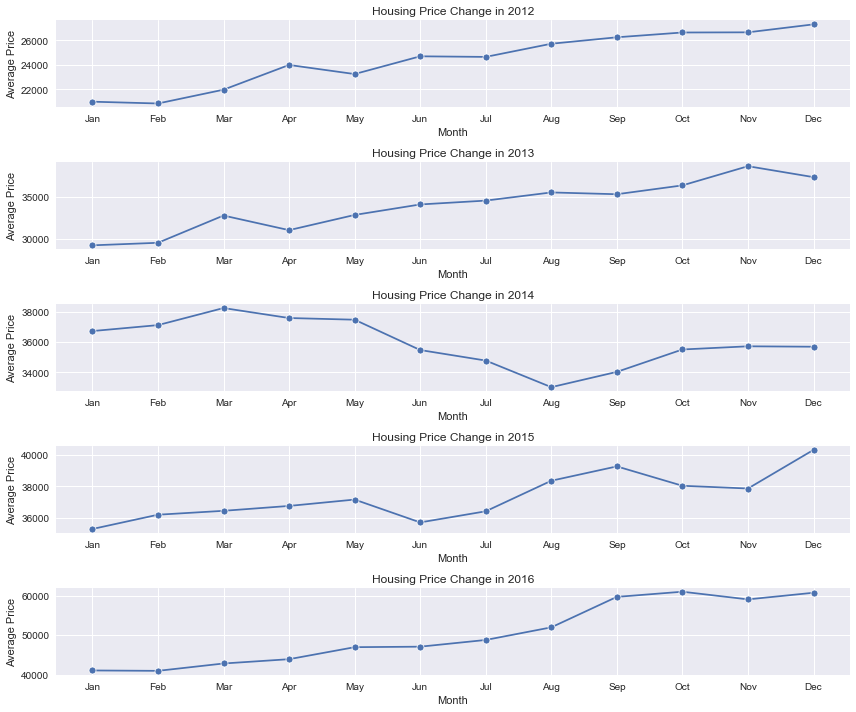

In [296]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().reset_index()

# Set up the subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 10))  # Adjust the size as needed
axes = axes.flatten() # flattens the array of axes for easy iteration.

# Create line plots for each year
years = df_avg_price['TransYear'].unique()
for i, year in enumerate(years):
    ax = axes[i]
    sns.lineplot(data=df_avg_price[df_avg_price['TransYear'] == year], x='TransMonth', y='UnitPrice', marker='o', ax=ax)
    ax.set_title('Housing Price Change in ' + str(year))
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Price')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

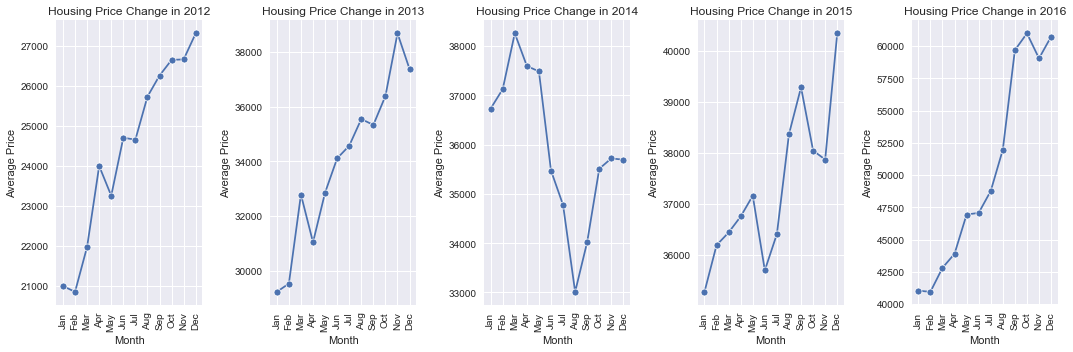

In [308]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().reset_index()

# Set up the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Adjust the size as needed
axes = axes.flatten()

# Create line plots for each year
years = df_avg_price['TransYear'].unique()
for i, year in enumerate(years):
    ax = axes[i]
    sns.lineplot(data=df_avg_price[df_avg_price['TransYear'] == year], x='TransMonth', y='UnitPrice', marker='o', ax=ax)
    ax.set_title('Housing Price Change in ' + str(year))
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Price')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.tick_params(axis='x', rotation=90) 
    
    plt.tight_layout()
plt.show()

The following code ensures that all subplots share the same y title, y label, and y tick labels. 

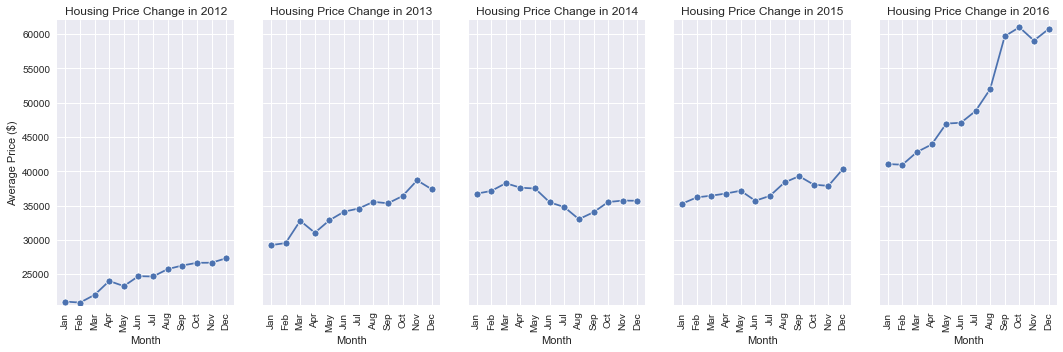

In [309]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().reset_index()

# Set up the subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Adjust the size as needed
axes = axes.flatten()

# Create line plots for each year
years = df_avg_price['TransYear'].unique()
y_limits = []

for i, year in enumerate(years):
    ax = axes[i]
    sns.lineplot(data=df_avg_price[df_avg_price['TransYear'] == year], x='TransMonth', y='UnitPrice', marker='o', ax=ax)
    if i == 0:
        ax.set_ylabel('Average Price ($)')
    else:
        ax.set_ylabel('')
        ax.set_yticklabels([]) 
    ax.set_xlabel('Month')
    ax.set_xticks(range(1, 13))
    ax.tick_params(axis='x', rotation=90) 
    ax.set_title('Housing Price Change in ' + str(year))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    y_limits.append(ax.get_ylim())

# Set the same y-axis limits for all plots
y_min = min([limit[0] for limit in y_limits])
y_max = max([limit[1] for limit in y_limits])

for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

### In-class exercise
- (1) visualize the relationship between unit housing price (UnitPrice) and the number of bedrooms (Bedroom)
- (2) visualize the relationship between unit housing price (UnitPrice) and the districts (DistName_En)
- (3) visualize the houisng price change between 2012-2016 for the district Xicheng
- (4) visualize the houisng price change between 2012-2016 for the district Xicheng, Dongcheng, Chaoyang, and Haidian (hint: using Lineplot. Google how to do this using `sns.lineplot()`
- (5) visualize the relationship between unit housing price (UnitPrice) and the distance to CBD. 
- (6) show the transaction counts by month from Jan 2012 to Dec 2016


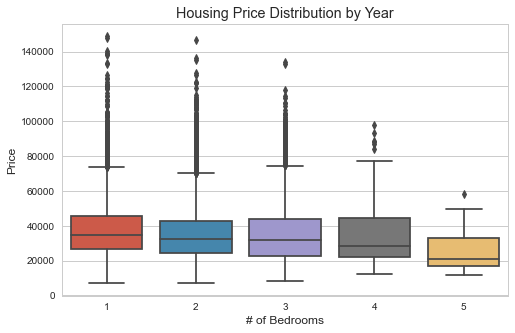

In [166]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_combine, x='Bedroom', y='UnitPrice')
plt.title('Housing Price Distribution by Year')
plt.xlabel('# of Bedrooms')
plt.ylabel('Price')
plt.show()

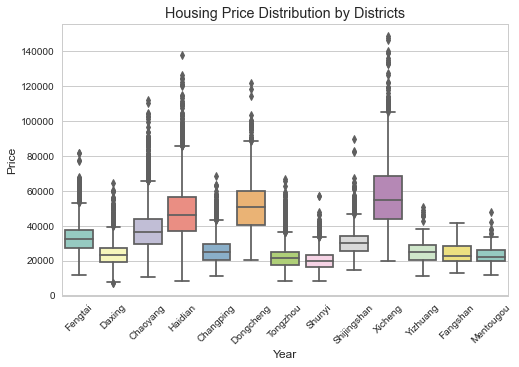

In [167]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_combine, x='DistName_En', y='UnitPrice', palette='Set3')
plt.title('Housing Price Distribution by Districts')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

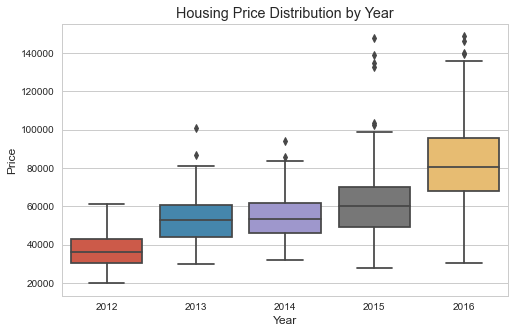

In [175]:
plt.figure(figsize=(8, 5))

df_xicheng = df_combine[df_combine['DistName_En'] == 'Xicheng']

sns.boxplot(data=df_xicheng, x='TransYear', y='UnitPrice')
plt.title('Housing Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

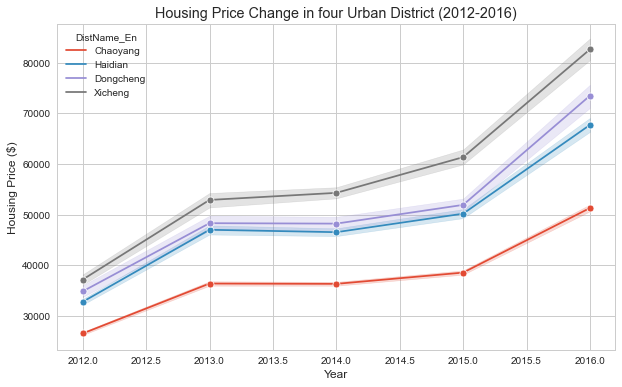

In [183]:
urban_district = ["Xicheng", "Dongcheng", "Chaoyang", "Haidian"]

df_selectdist = df_combine[df_combine["DistName_En"].isin(urban_district)] 
# df_selectdist['TransYear'] = df_selectdist['TransYear'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_selectdist, x='TransYear', y='UnitPrice', hue = "DistName_En", marker='o')
plt.title('Housing Price Change in four Urban District (2012-2016)')
plt.xlabel('Year')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.show()


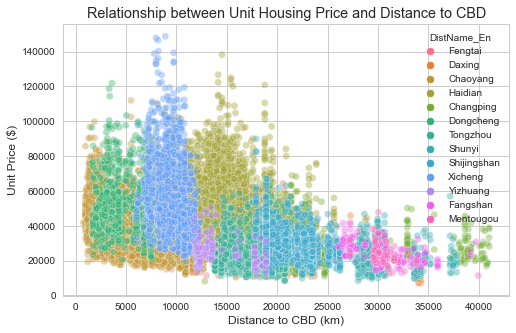

In [196]:
# Plotting the scatter plot for unit housing prices vs distance to CBD
plt.figure(figsize=(8, 5))

sns.scatterplot(data=df_combine, x='Dist2CBD', y='UnitPrice', hue = "DistName_En", alpha = 0.4)

plt.title('Relationship between Unit Housing Price and Distance to CBD')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Unit Price ($)')
plt.show()

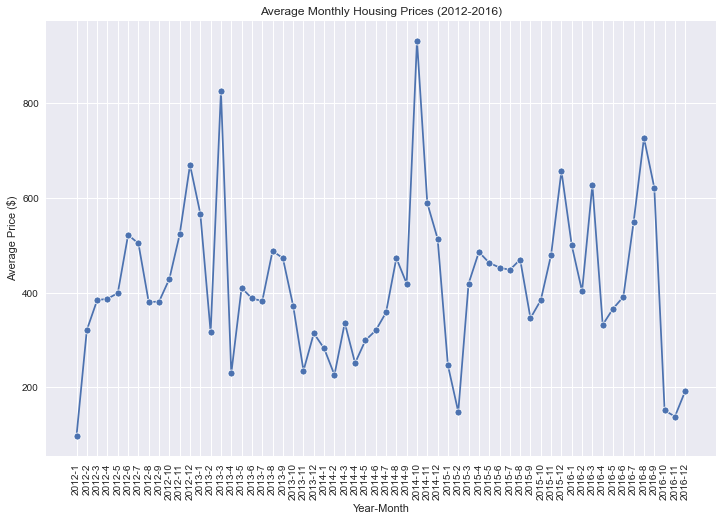

In [267]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].count().reset_index()

# Combine year and month into a single column for plotting
df_avg_price['year_month'] = df_avg_price['TransYear'].astype(str) + '-' + df_avg_price['TransMonth'].astype(str)

# df_avg_price['year_month'] = pd.to_datetime(df_avg_price['TransYear'].astype(str) + 
#                                             '-' + df_avg_price['TransMonth'].astype(str) + 
#                                             '-01')

# Plotting the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_avg_price, x='year_month', y='UnitPrice', marker='o')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Year-Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

Text(88.0, 0.5, 'Year')

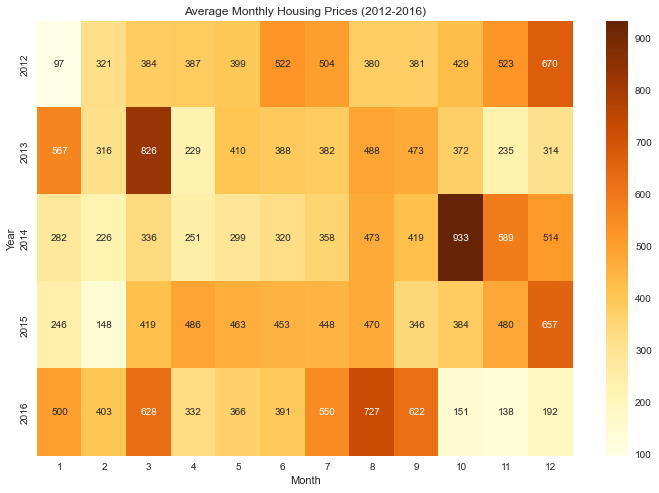

In [268]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].count().unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_avg_price, annot=True, fmt=".0f", cmap='YlOrBr')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Month')
plt.ylabel('Year')